<a href="https://colab.research.google.com/github/BillyTevin11/Coding-Projects/blob/main/Temperature_Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import ee
import geemap as gee

In [2]:
ee.Authenticate()
ee.Initialize(project='ee-vindevon11')

*** Earth Engine *** Share your feedback by taking our Annual Developer Satisfaction Survey: https://google.qualtrics.com/jfe/form/SV_0JLhFqfSY1uiEaW?source=Init


In [3]:
temp = ee.ImageCollection('ECMWF/ERA5_LAND/MONTHLY_AGGR').filterDate('2023', '2024').select('temperature_2m')
temp

In [4]:
map = gee.Map(basemap='SATELLITE')
map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [6]:
roi = map.draw_last_feature.geometry()
roi

ee.Geometry({
  "functionInvocationValue": {
    "functionName": "Feature.geometry",
    "arguments": {
      "feature": {
        "functionInvocationValue": {
          "functionName": "Feature",
          "arguments": {
            "geometry": {
              "functionInvocationValue": {
                "functionName": "GeometryConstructors.Polygon",
                "arguments": {
                  "coordinates": {
                    "constantValue": [
                      [
                        [
                          35.877267,
                          -0.37011
                        ],
                        [
                          35.877267,
                          -0.269861
                        ],
                        [
                          35.996078,
                          -0.269861
                        ],
                        [
                          35.996078,
                          -0.37011
                        ],
                        [
                          35.877267,
                          -0.37011
                        ]
                      ]
                    ]
                  },
                  "geodesic": {
                    "constantValue": false
                  }
                }
              }
            }
          }
        }
      }
    }
  }
})

In [12]:
def temp_val(img):
  date = img.date().format('YYYY-MM-dd')
  temp_mean = img.reduceRegion(reducer = ee.Reducer.mean(), geometry =roi, scale = 10000).values().get(0)
  return ee.Feature(None, {'date':date, 'temp':temp_mean})

In [13]:
features = temp.map(temp_val)
features

In [14]:
data_list = features.toList(features.size()).getInfo()
data_list

[{'type': 'Feature',
  'geometry': None,
  'id': '202301',
  'properties': {'date': '2023-01-01', 'temp': 289.39197914167806}},
 {'type': 'Feature',
  'geometry': None,
  'id': '202302',
  'properties': {'date': '2023-02-01', 'temp': 290.8860985496898}},
 {'type': 'Feature',
  'geometry': None,
  'id': '202303',
  'properties': {'date': '2023-03-01', 'temp': 290.0203045310438}},
 {'type': 'Feature',
  'geometry': None,
  'id': '202304',
  'properties': {'date': '2023-04-01', 'temp': 289.1558798510211}},
 {'type': 'Feature',
  'geometry': None,
  'id': '202305',
  'properties': {'date': '2023-05-01', 'temp': 288.9871790146349}},
 {'type': 'Feature',
  'geometry': None,
  'id': '202306',
  'properties': {'date': '2023-06-01', 'temp': 288.6657498897348}},
 {'type': 'Feature',
  'geometry': None,
  'id': '202307',
  'properties': {'date': '2023-07-01', 'temp': 288.17792757844575}},
 {'type': 'Feature',
  'geometry': None,
  'id': '202308',
  'properties': {'date': '2023-08-01', 'temp': 288

In [15]:
date = [item['properties']['date'] for item in data_list]
temp_list = [item['properties']['temp'] for item in data_list]

temp_list

[289.39197914167806,
 290.8860985496898,
 290.0203045310438,
 289.1558798510211,
 288.9871790146349,
 288.6657498897348,
 288.17792757844575,
 288.35670688316844,
 288.872667240634,
 289.72652843032824,
 288.4908288648449,
 289.5356569295044]

In [16]:
import pandas as pd

In [18]:
df = pd.DataFrame({'date':date, 'temp':temp_list}).round(2)
df

,date,temp
0,2023-01-01,289.39
1,2023-02-01,290.89
2,2023-03-01,290.02
3,2023-04-01,289.16
4,2023-05-01,288.99
5,2023-06-01,288.67
6,2023-07-01,288.18
7,2023-08-01,288.36
8,2023-09-01,288.87
9,2023-10-01,289.73


In [20]:
df.to_csv('Nakuru Mean Temperature in 2023.csv')

In [21]:
df['date'] = pd.to_datetime(df['date'])

In [22]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Nakuru Mean Temperature in 2023')

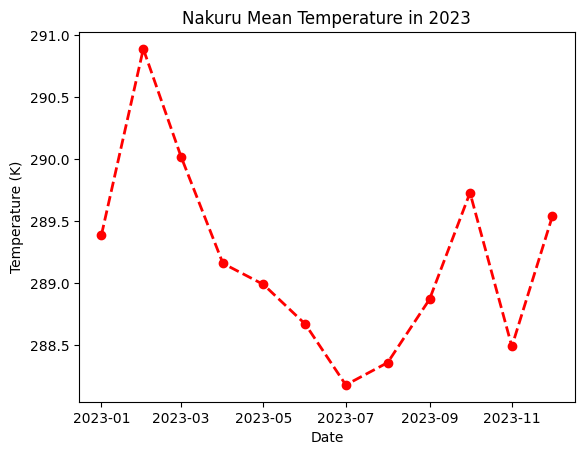

In [37]:
plt.plot(df['date'], df['temp'], lw =2, ls = '--', color = 'red', marker = 'o')
plt.xlabel('Date')
plt.ylabel('Temperature (K)')
plt.title('Nakuru Mean Temperature in 2023')

# plt.savefig('Nakuru Mean Temperature in 2023.png', dpi = 360)